In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.datasets import load_breast_cancer, load_digits
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
%matplotlib inline

# Breast Cancer

In [2]:
seed=2020
np.random.seed(seed)
tf.random.set_seed(seed)

In [3]:
bc=load_breast_cancer()
cancer=pd.DataFrame(bc.data)
cancer.head(5)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
X=cancer
Y=bc.target

In [5]:
model1=Sequential([
    Dense(30, input_shape=(30,), activation="relu"),
    Dense(12, activation="relu"),
    Dense(8, activation="relu"),
    Dense(1, activation="sigmoid")
])
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                930       
_________________________________________________________________
dense_1 (Dense)              (None, 12)                372       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 1,415
Trainable params: 1,415
Non-trainable params: 0
_________________________________________________________________


In [6]:
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.2, random_state=seed)

In [7]:
model1.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [8]:
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=100)

In [9]:
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

In [10]:
modelpath = MODEL_DIR + "cancer.hdf5"

checkpointer_callback = ModelCheckpoint(filepath=modelpath, monitor='val_loss', 
                               verbose=1, save_best_only=True)

In [11]:
history = model1.fit(X_train, Y_train, validation_split=0.2, epochs=5000, batch_size=300,
                    verbose=0, callbacks=[early_stopping_callback, checkpointer_callback])


Epoch 00001: val_loss improved from inf to 106.15232, saving model to ./model/cancer.hdf5

Epoch 00002: val_loss improved from 106.15232 to 95.30475, saving model to ./model/cancer.hdf5

Epoch 00003: val_loss improved from 95.30475 to 84.76141, saving model to ./model/cancer.hdf5

Epoch 00004: val_loss improved from 84.76141 to 74.62350, saving model to ./model/cancer.hdf5

Epoch 00005: val_loss improved from 74.62350 to 65.34195, saving model to ./model/cancer.hdf5

Epoch 00006: val_loss improved from 65.34195 to 57.16920, saving model to ./model/cancer.hdf5

Epoch 00007: val_loss improved from 57.16920 to 49.49594, saving model to ./model/cancer.hdf5

Epoch 00008: val_loss improved from 49.49594 to 41.91723, saving model to ./model/cancer.hdf5

Epoch 00009: val_loss improved from 41.91723 to 34.55758, saving model to ./model/cancer.hdf5

Epoch 00010: val_loss improved from 34.55758 to 27.55625, saving model to ./model/cancer.hdf5

Epoch 00011: val_loss improved from 27.55625 to 20.8


Epoch 00097: val_loss improved from 0.32443 to 0.31181, saving model to ./model/cancer.hdf5

Epoch 00098: val_loss improved from 0.31181 to 0.30525, saving model to ./model/cancer.hdf5

Epoch 00099: val_loss improved from 0.30525 to 0.29964, saving model to ./model/cancer.hdf5

Epoch 00100: val_loss improved from 0.29964 to 0.29388, saving model to ./model/cancer.hdf5

Epoch 00101: val_loss improved from 0.29388 to 0.28832, saving model to ./model/cancer.hdf5

Epoch 00102: val_loss improved from 0.28832 to 0.28563, saving model to ./model/cancer.hdf5

Epoch 00103: val_loss improved from 0.28563 to 0.27779, saving model to ./model/cancer.hdf5

Epoch 00104: val_loss improved from 0.27779 to 0.27135, saving model to ./model/cancer.hdf5

Epoch 00105: val_loss improved from 0.27135 to 0.26584, saving model to ./model/cancer.hdf5

Epoch 00106: val_loss improved from 0.26584 to 0.26056, saving model to ./model/cancer.hdf5

Epoch 00107: val_loss improved from 0.26056 to 0.25651, saving model 


Epoch 00218: val_loss did not improve from 0.16081

Epoch 00219: val_loss did not improve from 0.16081

Epoch 00220: val_loss did not improve from 0.16081

Epoch 00221: val_loss did not improve from 0.16081

Epoch 00222: val_loss did not improve from 0.16081

Epoch 00223: val_loss improved from 0.16081 to 0.16028, saving model to ./model/cancer.hdf5

Epoch 00224: val_loss did not improve from 0.16028

Epoch 00225: val_loss improved from 0.16028 to 0.15843, saving model to ./model/cancer.hdf5

Epoch 00226: val_loss improved from 0.15843 to 0.15551, saving model to ./model/cancer.hdf5

Epoch 00227: val_loss improved from 0.15551 to 0.15537, saving model to ./model/cancer.hdf5

Epoch 00228: val_loss did not improve from 0.15537

Epoch 00229: val_loss did not improve from 0.15537

Epoch 00230: val_loss did not improve from 0.15537

Epoch 00231: val_loss did not improve from 0.15537

Epoch 00232: val_loss did not improve from 0.15537

Epoch 00233: val_loss improved from 0.15537 to 0.15516,


Epoch 00357: val_loss did not improve from 0.11412

Epoch 00358: val_loss improved from 0.11412 to 0.11229, saving model to ./model/cancer.hdf5

Epoch 00359: val_loss did not improve from 0.11229

Epoch 00360: val_loss did not improve from 0.11229

Epoch 00361: val_loss did not improve from 0.11229

Epoch 00362: val_loss did not improve from 0.11229

Epoch 00363: val_loss did not improve from 0.11229

Epoch 00364: val_loss did not improve from 0.11229

Epoch 00365: val_loss did not improve from 0.11229

Epoch 00366: val_loss did not improve from 0.11229

Epoch 00367: val_loss did not improve from 0.11229

Epoch 00368: val_loss did not improve from 0.11229

Epoch 00369: val_loss did not improve from 0.11229

Epoch 00370: val_loss did not improve from 0.11229

Epoch 00371: val_loss did not improve from 0.11229

Epoch 00372: val_loss did not improve from 0.11229

Epoch 00373: val_loss did not improve from 0.11229

Epoch 00374: val_loss did not improve from 0.11229

Epoch 00375: val_loss 


Epoch 00499: val_loss did not improve from 0.08635

Epoch 00500: val_loss improved from 0.08635 to 0.08582, saving model to ./model/cancer.hdf5

Epoch 00501: val_loss did not improve from 0.08582

Epoch 00502: val_loss did not improve from 0.08582

Epoch 00503: val_loss did not improve from 0.08582

Epoch 00504: val_loss did not improve from 0.08582

Epoch 00505: val_loss improved from 0.08582 to 0.08572, saving model to ./model/cancer.hdf5

Epoch 00506: val_loss did not improve from 0.08572

Epoch 00507: val_loss improved from 0.08572 to 0.08145, saving model to ./model/cancer.hdf5

Epoch 00508: val_loss did not improve from 0.08145

Epoch 00509: val_loss improved from 0.08145 to 0.07944, saving model to ./model/cancer.hdf5

Epoch 00510: val_loss improved from 0.07944 to 0.07899, saving model to ./model/cancer.hdf5

Epoch 00511: val_loss did not improve from 0.07899

Epoch 00512: val_loss did not improve from 0.07899

Epoch 00513: val_loss did not improve from 0.07899

Epoch 00514: v

Epoch 00646: val_loss did not improve from 0.05651

Epoch 00647: val_loss did not improve from 0.05651

Epoch 00648: val_loss did not improve from 0.05651

Epoch 00649: val_loss did not improve from 0.05651

Epoch 00650: val_loss did not improve from 0.05651

Epoch 00651: val_loss did not improve from 0.05651

Epoch 00652: val_loss did not improve from 0.05651

Epoch 00653: val_loss did not improve from 0.05651

Epoch 00654: val_loss did not improve from 0.05651

Epoch 00655: val_loss did not improve from 0.05651

Epoch 00656: val_loss did not improve from 0.05651

Epoch 00657: val_loss did not improve from 0.05651

Epoch 00658: val_loss did not improve from 0.05651

Epoch 00659: val_loss did not improve from 0.05651

Epoch 00660: val_loss did not improve from 0.05651

Epoch 00661: val_loss did not improve from 0.05651

Epoch 00662: val_loss did not improve from 0.05651

Epoch 00663: val_loss did not improve from 0.05651

Epoch 00664: val_loss did not improve from 0.05651

Epoch 00665:


Epoch 00806: val_loss did not improve from 0.04783

Epoch 00807: val_loss improved from 0.04783 to 0.04771, saving model to ./model/cancer.hdf5

Epoch 00808: val_loss did not improve from 0.04771

Epoch 00809: val_loss did not improve from 0.04771

Epoch 00810: val_loss did not improve from 0.04771

Epoch 00811: val_loss did not improve from 0.04771

Epoch 00812: val_loss did not improve from 0.04771

Epoch 00813: val_loss did not improve from 0.04771

Epoch 00814: val_loss did not improve from 0.04771

Epoch 00815: val_loss did not improve from 0.04771

Epoch 00816: val_loss did not improve from 0.04771

Epoch 00817: val_loss did not improve from 0.04771

Epoch 00818: val_loss did not improve from 0.04771

Epoch 00819: val_loss improved from 0.04771 to 0.04529, saving model to ./model/cancer.hdf5

Epoch 00820: val_loss did not improve from 0.04529

Epoch 00821: val_loss did not improve from 0.04529

Epoch 00822: val_loss did not improve from 0.04529

Epoch 00823: val_loss did not imp


Epoch 00959: val_loss did not improve from 0.04134

Epoch 00960: val_loss did not improve from 0.04134

Epoch 00961: val_loss did not improve from 0.04134

Epoch 00962: val_loss did not improve from 0.04134

Epoch 00963: val_loss did not improve from 0.04134

Epoch 00964: val_loss did not improve from 0.04134

Epoch 00965: val_loss did not improve from 0.04134

Epoch 00966: val_loss did not improve from 0.04134

Epoch 00967: val_loss did not improve from 0.04134

Epoch 00968: val_loss did not improve from 0.04134

Epoch 00969: val_loss did not improve from 0.04134

Epoch 00970: val_loss did not improve from 0.04134

Epoch 00971: val_loss improved from 0.04134 to 0.04021, saving model to ./model/cancer.hdf5

Epoch 00972: val_loss did not improve from 0.04021

Epoch 00973: val_loss did not improve from 0.04021

Epoch 00974: val_loss did not improve from 0.04021

Epoch 00975: val_loss did not improve from 0.04021

Epoch 00976: val_loss did not improve from 0.04021

Epoch 00977: val_loss 


Epoch 01116: val_loss did not improve from 0.03793

Epoch 01117: val_loss did not improve from 0.03793

Epoch 01118: val_loss did not improve from 0.03793

Epoch 01119: val_loss did not improve from 0.03793

Epoch 01120: val_loss did not improve from 0.03793

Epoch 01121: val_loss did not improve from 0.03793

Epoch 01122: val_loss did not improve from 0.03793

Epoch 01123: val_loss did not improve from 0.03793

Epoch 01124: val_loss did not improve from 0.03793

Epoch 01125: val_loss did not improve from 0.03793

Epoch 01126: val_loss did not improve from 0.03793

Epoch 01127: val_loss did not improve from 0.03793

Epoch 01128: val_loss did not improve from 0.03793

Epoch 01129: val_loss did not improve from 0.03793

Epoch 01130: val_loss did not improve from 0.03793

Epoch 01131: val_loss did not improve from 0.03793

Epoch 01132: val_loss did not improve from 0.03793

Epoch 01133: val_loss did not improve from 0.03793

Epoch 01134: val_loss did not improve from 0.03793

Epoch 01135

Epoch 01293: val_loss did not improve from 0.03564

Epoch 01294: val_loss did not improve from 0.03564

Epoch 01295: val_loss did not improve from 0.03564

Epoch 01296: val_loss did not improve from 0.03564

Epoch 01297: val_loss did not improve from 0.03564

Epoch 01298: val_loss improved from 0.03564 to 0.03440, saving model to ./model/cancer.hdf5

Epoch 01299: val_loss did not improve from 0.03440

Epoch 01300: val_loss did not improve from 0.03440

Epoch 01301: val_loss did not improve from 0.03440

Epoch 01302: val_loss did not improve from 0.03440

Epoch 01303: val_loss did not improve from 0.03440

Epoch 01304: val_loss did not improve from 0.03440

Epoch 01305: val_loss did not improve from 0.03440

Epoch 01306: val_loss did not improve from 0.03440

Epoch 01307: val_loss did not improve from 0.03440

Epoch 01308: val_loss did not improve from 0.03440

Epoch 01309: val_loss did not improve from 0.03440

Epoch 01310: val_loss did not improve from 0.03440

Epoch 01311: val_loss d


Epoch 01452: val_loss did not improve from 0.03275

Epoch 01453: val_loss did not improve from 0.03275

Epoch 01454: val_loss did not improve from 0.03275

Epoch 01455: val_loss did not improve from 0.03275

Epoch 01456: val_loss did not improve from 0.03275

Epoch 01457: val_loss did not improve from 0.03275

Epoch 01458: val_loss did not improve from 0.03275

Epoch 01459: val_loss did not improve from 0.03275

Epoch 01460: val_loss did not improve from 0.03275

Epoch 01461: val_loss did not improve from 0.03275

Epoch 01462: val_loss did not improve from 0.03275

Epoch 01463: val_loss did not improve from 0.03275

Epoch 01464: val_loss did not improve from 0.03275

Epoch 01465: val_loss did not improve from 0.03275

Epoch 01466: val_loss did not improve from 0.03275

Epoch 01467: val_loss did not improve from 0.03275

Epoch 01468: val_loss did not improve from 0.03275

Epoch 01469: val_loss did not improve from 0.03275

Epoch 01470: val_loss did not improve from 0.03275

Epoch 01471


Epoch 01629: val_loss did not improve from 0.03215

Epoch 01630: val_loss did not improve from 0.03215

Epoch 01631: val_loss did not improve from 0.03215

Epoch 01632: val_loss did not improve from 0.03215

Epoch 01633: val_loss did not improve from 0.03215

Epoch 01634: val_loss did not improve from 0.03215

Epoch 01635: val_loss did not improve from 0.03215

Epoch 01636: val_loss did not improve from 0.03215

Epoch 01637: val_loss did not improve from 0.03215

Epoch 01638: val_loss did not improve from 0.03215

Epoch 01639: val_loss did not improve from 0.03215

Epoch 01640: val_loss did not improve from 0.03215

Epoch 01641: val_loss did not improve from 0.03215

Epoch 01642: val_loss did not improve from 0.03215

Epoch 01643: val_loss did not improve from 0.03215

Epoch 01644: val_loss did not improve from 0.03215

Epoch 01645: val_loss did not improve from 0.03215

Epoch 01646: val_loss did not improve from 0.03215

Epoch 01647: val_loss did not improve from 0.03215

Epoch 01648


Epoch 01814: val_loss did not improve from 0.03118

Epoch 01815: val_loss did not improve from 0.03118

Epoch 01816: val_loss did not improve from 0.03118

Epoch 01817: val_loss did not improve from 0.03118

Epoch 01818: val_loss did not improve from 0.03118

Epoch 01819: val_loss did not improve from 0.03118

Epoch 01820: val_loss did not improve from 0.03118

Epoch 01821: val_loss did not improve from 0.03118

Epoch 01822: val_loss did not improve from 0.03118

Epoch 01823: val_loss did not improve from 0.03118

Epoch 01824: val_loss did not improve from 0.03118

Epoch 01825: val_loss did not improve from 0.03118

Epoch 01826: val_loss did not improve from 0.03118

Epoch 01827: val_loss did not improve from 0.03118

Epoch 01828: val_loss did not improve from 0.03118

Epoch 01829: val_loss did not improve from 0.03118

Epoch 01830: val_loss did not improve from 0.03118

Epoch 01831: val_loss did not improve from 0.03118

Epoch 01832: val_loss did not improve from 0.03118

Epoch 01833

In [12]:
del model1

In [13]:
model1 = load_model('model/cancer.hdf5')
print("\n Accuracy: %.4f" % (model1.evaluate(X_test, Y_test, verbose=2)[1]))

114/114 - 0s - loss: 0.1236 - accuracy: 0.9737

 Accuracy: 0.9737


# MNIST

In [14]:
df=load_digits()
df

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [15]:
digit=pd.DataFrame(df.data)
digit.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [16]:
x=digit.astype(float)
y_obj=df.target.astype(float)

In [17]:
e = LabelEncoder()
e.fit(y_obj)
y = e.transform(y_obj)

In [18]:
y.shape

(1797,)

In [19]:
y_encoded = tf.keras.utils.to_categorical(y)
y_encoded.shape

(1797, 10)

In [20]:
x_train, x_test, y_train, y_test=train_test_split(x, y_encoded, test_size=0.2, random_state=seed)

In [21]:
y_train.shape

(1437, 10)

In [22]:
model=Sequential([
    Dense(500, input_shape=(64,), activation="relu"),
    Dense(300, activation="relu"),
    Dense(100, activation="relu"),
    Dense(10, activation="softmax")
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 500)               32500     
_________________________________________________________________
dense_5 (Dense)              (None, 300)               150300    
_________________________________________________________________
dense_6 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1010      
Total params: 213,910
Trainable params: 213,910
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [24]:
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=100)

In [25]:
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

In [26]:
modelpath = MODEL_DIR + "MNIST{epoch:03d}-{val_loss:.4f}.hdf5"

checkpointer_callback = ModelCheckpoint(filepath=modelpath, monitor='val_loss', 
                               verbose=1, save_best_only=True)

In [27]:
history=model.fit(x_train, y_train, validation_split=0.2, epochs=5000, batch_size=1000,
                    verbose=2, callbacks=[early_stopping_callback, checkpointer_callback])

Train on 1149 samples, validate on 288 samples
Epoch 1/5000

Epoch 00001: val_loss improved from inf to 3.27083, saving model to ./model/MNIST.hdf5
1149/1149 - 0s - loss: 5.2923 - accuracy: 0.1062 - val_loss: 3.2708 - val_accuracy: 0.1910
Epoch 2/5000

Epoch 00002: val_loss improved from 3.27083 to 2.13463, saving model to ./model/MNIST.hdf5
1149/1149 - 0s - loss: 3.2315 - accuracy: 0.2472 - val_loss: 2.1346 - val_accuracy: 0.4236
Epoch 3/5000

Epoch 00003: val_loss improved from 2.13463 to 1.52408, saving model to ./model/MNIST.hdf5
1149/1149 - 0s - loss: 2.1293 - accuracy: 0.4595 - val_loss: 1.5241 - val_accuracy: 0.4375
Epoch 4/5000

Epoch 00004: val_loss improved from 1.52408 to 1.02713, saving model to ./model/MNIST.hdf5
1149/1149 - 0s - loss: 1.4462 - accuracy: 0.5074 - val_loss: 1.0271 - val_accuracy: 0.5972
Epoch 5/5000

Epoch 00005: val_loss improved from 1.02713 to 0.70072, saving model to ./model/MNIST.hdf5
1149/1149 - 0s - loss: 0.8606 - accuracy: 0.7084 - val_loss: 0.7007 

Epoch 45/5000

Epoch 00045: val_loss did not improve from 0.06556
1149/1149 - 0s - loss: 0.0064 - accuracy: 1.0000 - val_loss: 0.0747 - val_accuracy: 0.9722
Epoch 46/5000

Epoch 00046: val_loss did not improve from 0.06556
1149/1149 - 0s - loss: 0.0060 - accuracy: 1.0000 - val_loss: 0.0696 - val_accuracy: 0.9757
Epoch 47/5000

Epoch 00047: val_loss did not improve from 0.06556
1149/1149 - 0s - loss: 0.0060 - accuracy: 1.0000 - val_loss: 0.0683 - val_accuracy: 0.9757
Epoch 48/5000

Epoch 00048: val_loss did not improve from 0.06556
1149/1149 - 0s - loss: 0.0058 - accuracy: 1.0000 - val_loss: 0.0693 - val_accuracy: 0.9757
Epoch 49/5000

Epoch 00049: val_loss did not improve from 0.06556
1149/1149 - 0s - loss: 0.0053 - accuracy: 1.0000 - val_loss: 0.0696 - val_accuracy: 0.9792
Epoch 50/5000

Epoch 00050: val_loss did not improve from 0.06556
1149/1149 - 0s - loss: 0.0048 - accuracy: 1.0000 - val_loss: 0.0687 - val_accuracy: 0.9757
Epoch 51/5000

Epoch 00051: val_loss did not improve from 

Epoch 00096: val_loss did not improve from 0.05747
1149/1149 - 0s - loss: 9.5717e-04 - accuracy: 1.0000 - val_loss: 0.0640 - val_accuracy: 0.9826
Epoch 97/5000

Epoch 00097: val_loss did not improve from 0.05747
1149/1149 - 0s - loss: 9.3428e-04 - accuracy: 1.0000 - val_loss: 0.0661 - val_accuracy: 0.9826
Epoch 98/5000

Epoch 00098: val_loss did not improve from 0.05747
1149/1149 - 0s - loss: 9.1963e-04 - accuracy: 1.0000 - val_loss: 0.0668 - val_accuracy: 0.9826
Epoch 99/5000

Epoch 00099: val_loss did not improve from 0.05747
1149/1149 - 0s - loss: 9.0241e-04 - accuracy: 1.0000 - val_loss: 0.0664 - val_accuracy: 0.9826
Epoch 100/5000

Epoch 00100: val_loss did not improve from 0.05747
1149/1149 - 0s - loss: 8.7896e-04 - accuracy: 1.0000 - val_loss: 0.0647 - val_accuracy: 0.9826
Epoch 101/5000

Epoch 00101: val_loss did not improve from 0.05747
1149/1149 - 0s - loss: 8.5408e-04 - accuracy: 1.0000 - val_loss: 0.0622 - val_accuracy: 0.9826
Epoch 102/5000

Epoch 00102: val_loss did not i

Epoch 147/5000

Epoch 00147: val_loss did not improve from 0.05747
1149/1149 - 0s - loss: 3.7549e-04 - accuracy: 1.0000 - val_loss: 0.0654 - val_accuracy: 0.9792
Epoch 148/5000

Epoch 00148: val_loss did not improve from 0.05747
1149/1149 - 0s - loss: 3.7014e-04 - accuracy: 1.0000 - val_loss: 0.0648 - val_accuracy: 0.9792
Epoch 149/5000

Epoch 00149: val_loss did not improve from 0.05747
1149/1149 - 0s - loss: 3.6504e-04 - accuracy: 1.0000 - val_loss: 0.0641 - val_accuracy: 0.9792
Epoch 150/5000

Epoch 00150: val_loss did not improve from 0.05747
1149/1149 - 0s - loss: 3.6075e-04 - accuracy: 1.0000 - val_loss: 0.0637 - val_accuracy: 0.9792
Epoch 151/5000

Epoch 00151: val_loss did not improve from 0.05747
1149/1149 - 0s - loss: 3.5645e-04 - accuracy: 1.0000 - val_loss: 0.0638 - val_accuracy: 0.9792
Epoch 152/5000

Epoch 00152: val_loss did not improve from 0.05747
1149/1149 - 0s - loss: 3.5123e-04 - accuracy: 1.0000 - val_loss: 0.0639 - val_accuracy: 0.9792
Epoch 153/5000

Epoch 00153:

In [28]:
del model

In [29]:
model = load_model('model/MNIST.hdf5')
print("\n Accuracy: %.4f" % (model.evaluate(x_test, y_test, verbose=2)[1]))

360/360 - 0s - loss: 0.0709 - accuracy: 0.9806

 Accuracy: 0.9806


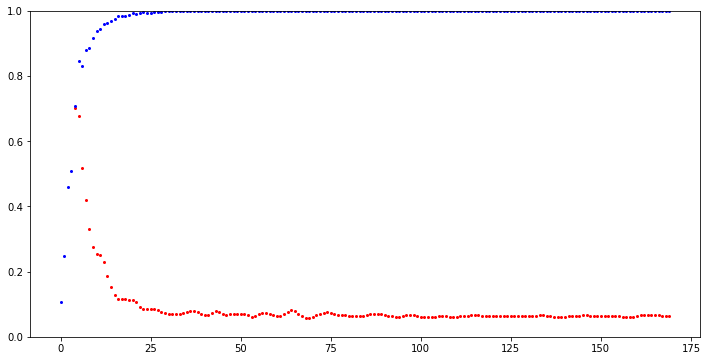

In [30]:
y_vloss=history.history['val_loss']
y_acc=history.history['accuracy']

x_len = np.arange(len(y_acc))
plt.figure(figsize=(12,6))
plt.ylim(0,1)
plt.plot(x_len, y_vloss, "o", c="red", markersize=2)
plt.plot(x_len, y_acc, "o", c="blue", markersize=2)
plt.show()

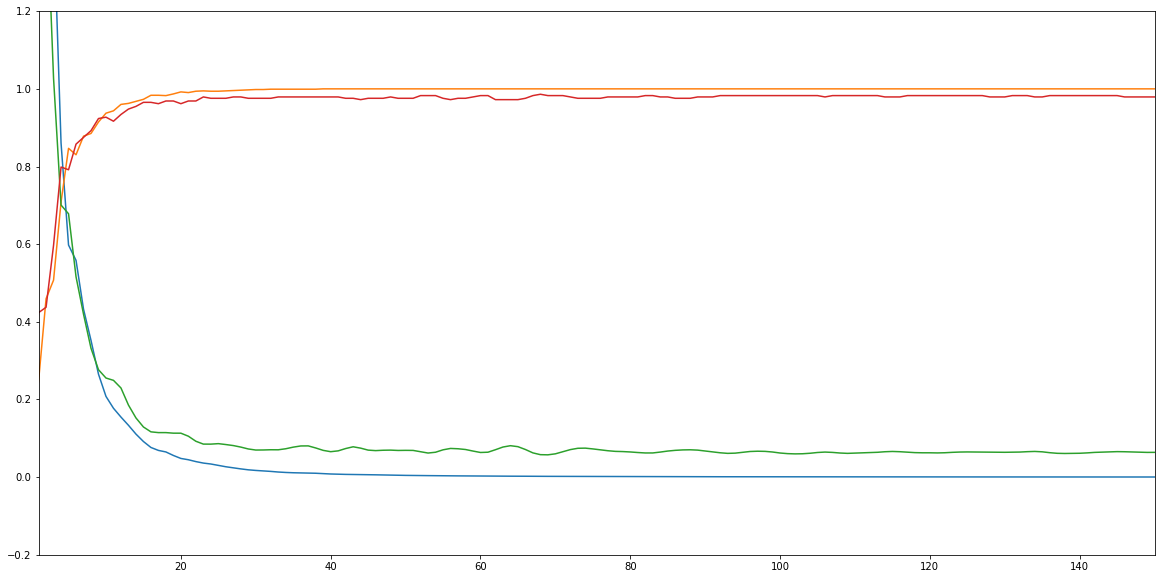

In [31]:
a=pd.DataFrame(history.history)
plt.figure(figsize=(20,10))
plt.xlim(1,150)
plt.ylim(-0.2,1.2)
plt.plot(a,"-",markersize=5)
plt.show()